In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the dataset
data = pd.read_csv('cancer.csv')
#Remove last column of NaN data.
data = data.iloc[:, :-1]

In [3]:
#Separating variables into features and target.
X = data.drop(['id','diagnosis'], axis=1).values
#Convert diagnosis to binary (M==1 B==0)
temp = data['diagnosis']
y = np.where(temp[:] == 'M',1,0)

#Scaling features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Number of principal components to explore
K_values = range(1, X.shape[1] + 1)

# Different kernel types to explore
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# Store the results
results = {kernel: {'accuracy': [], 'precision': [], 'recall': []} for kernel in kernels}

# Perform training and evaluation for different number of principal components and kernels
for kernel in kernels:
    for K in K_values:
        # Apply PCA
        pca = PCA(n_components=K)
        X_train_pca = pca.fit_transform(X_train)
        X_test_pca = pca.transform(X_test)

        # Train SVM classifier
        svm = SVC(kernel=kernel, random_state=42)
        svm.fit(X_train_pca, y_train)
        
        # Make predictions
        y_pred = svm.predict(X_test_pca)

        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)

        # Store the results
        results[kernel]['accuracy'].append(accuracy)
        results[kernel]['precision'].append(precision)
        results[kernel]['recall'].append(recall)

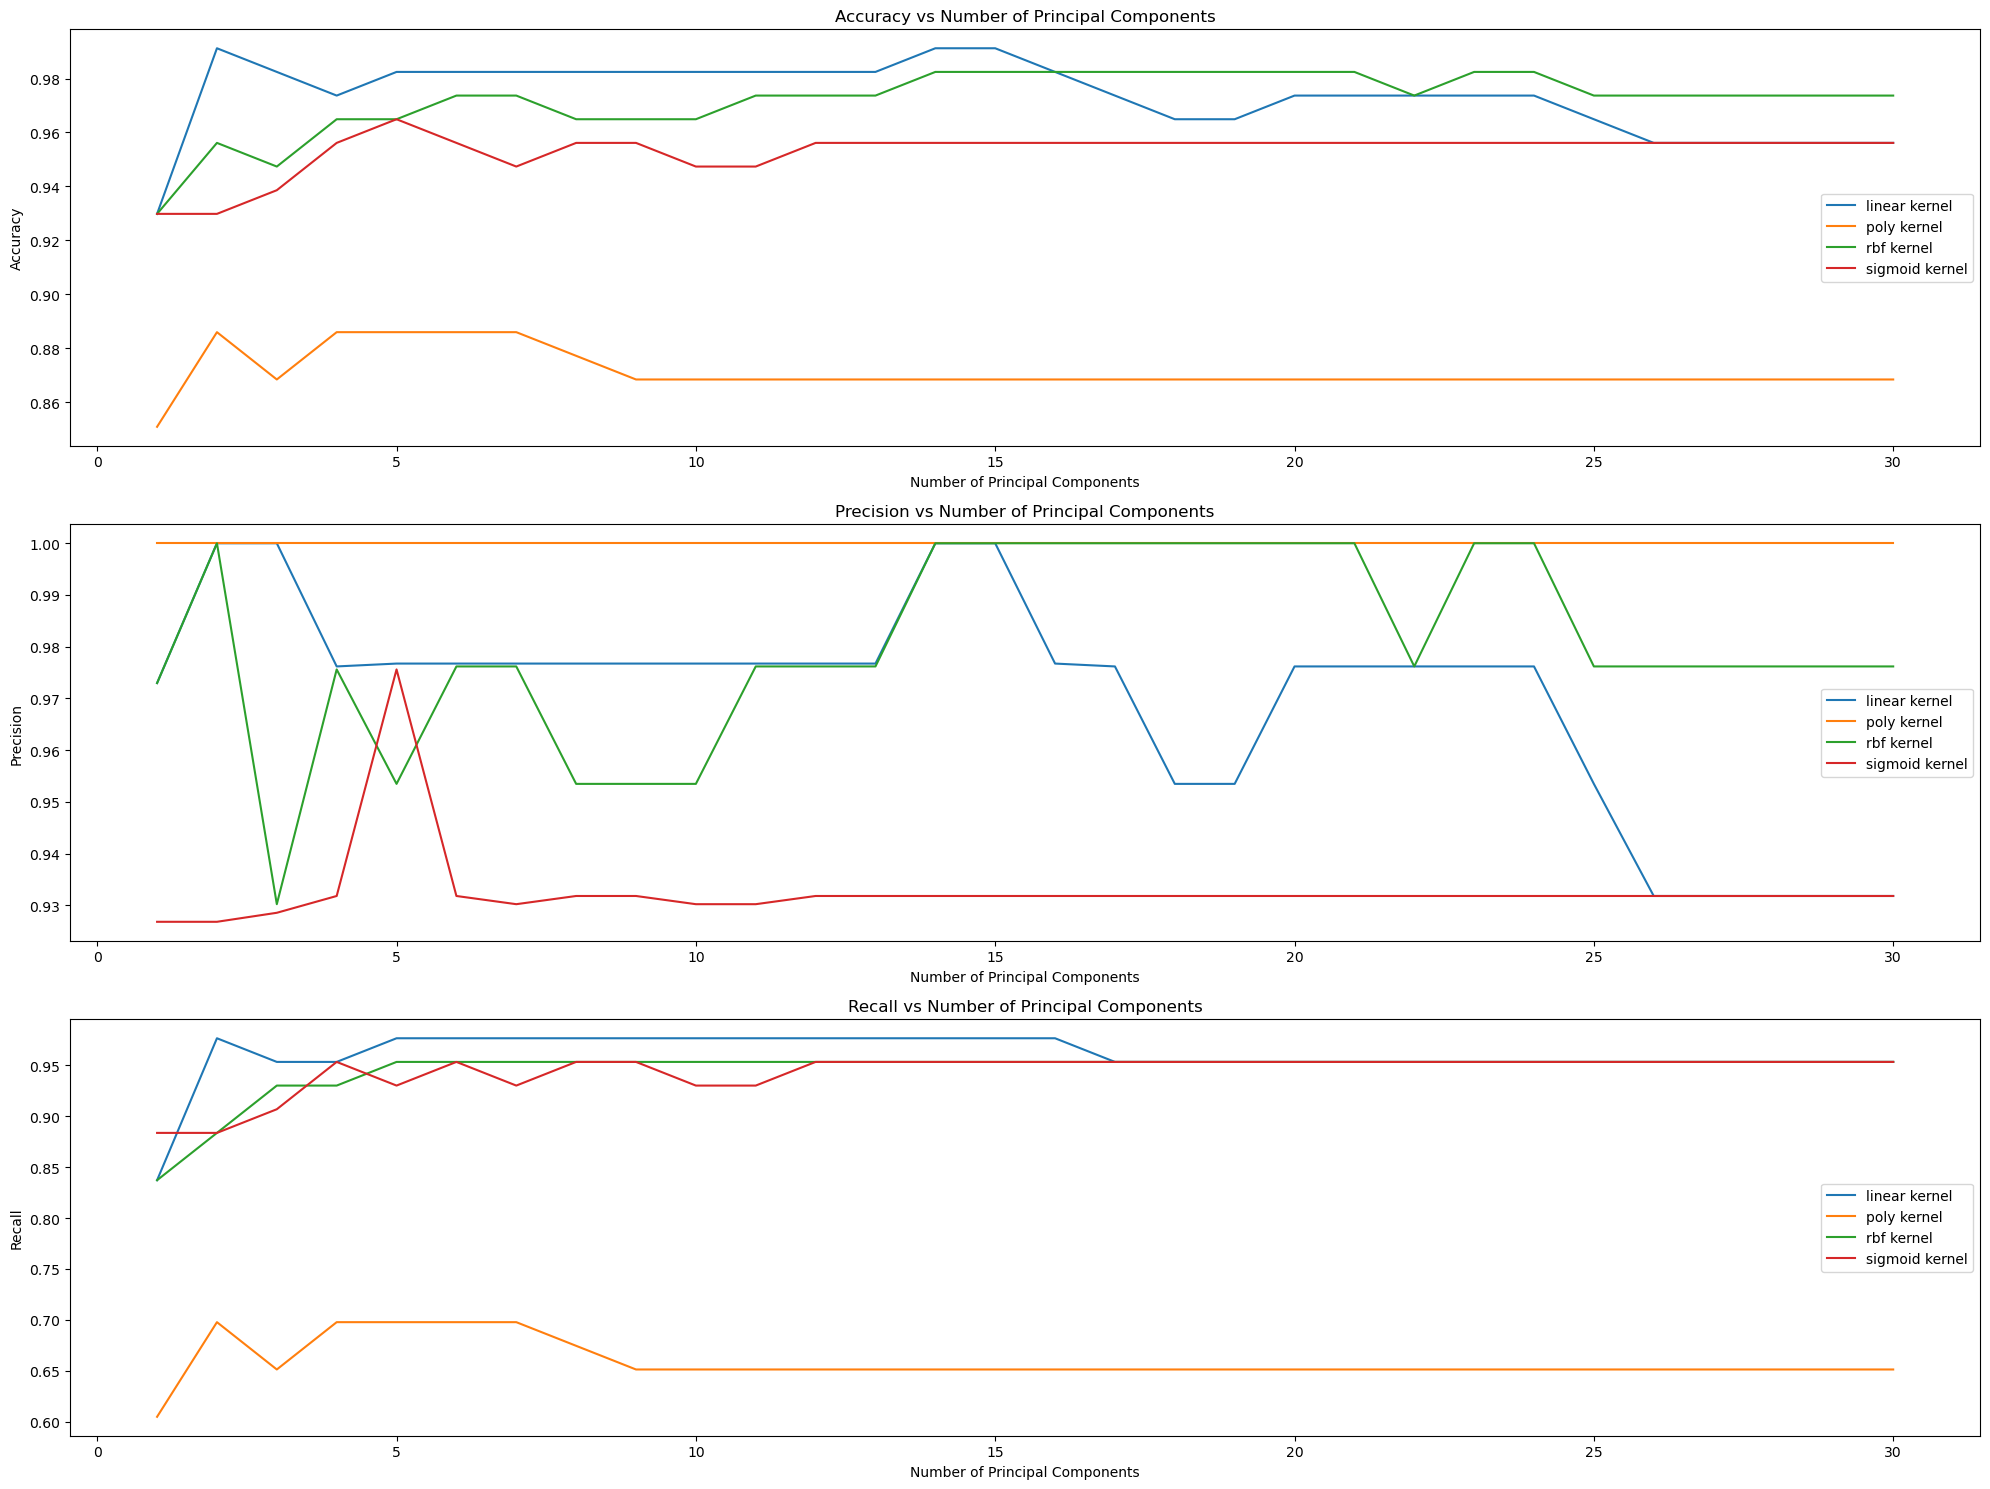

In [5]:
# Plot the results
plt.figure(figsize=(20, 15))

for i, metric in enumerate(['accuracy', 'precision', 'recall']):
    plt.subplot(3, 1, i + 1)
    for kernel in kernels:
        plt.plot(K_values, results[kernel][metric], label=f'{kernel} kernel')
    plt.xlabel('Number of Principal Components')
    plt.ylabel(metric.capitalize())
    plt.title(f'{metric.capitalize()} vs Number of Principal Components')
    plt.legend()

plt.tight_layout()
plt.show()

In [6]:
# Print the best K for each metric and kernel
for kernel in kernels:
    best_accuracy_index = np.argmax(results[kernel]['accuracy'])
    best_precision_index = np.argmax(results[kernel]['precision'])
    best_recall_index = np.argmax(results[kernel]['recall'])
    print(f'{kernel.capitalize()} kernel:')
    print(f'  Best K for accuracy: {K_values[best_accuracy_index]} with accuracy {results[kernel]["accuracy"][best_accuracy_index]:.4f}')
    print(f'  Best K for precision: {K_values[best_precision_index]} with precision {results[kernel]["precision"][best_precision_index]:.4f}')
    print(f'  Best K for recall: {K_values[best_recall_index]} with recall {results[kernel]["recall"][best_recall_index]:.4f}')
    print()

Linear kernel:
  Best K for accuracy: 2 with accuracy 0.9912
  Best K for precision: 2 with precision 1.0000
  Best K for recall: 2 with recall 0.9767

Poly kernel:
  Best K for accuracy: 2 with accuracy 0.8860
  Best K for precision: 1 with precision 1.0000
  Best K for recall: 2 with recall 0.6977

Rbf kernel:
  Best K for accuracy: 14 with accuracy 0.9825
  Best K for precision: 2 with precision 1.0000
  Best K for recall: 5 with recall 0.9535

Sigmoid kernel:
  Best K for accuracy: 5 with accuracy 0.9649
  Best K for precision: 5 with precision 0.9756
  Best K for recall: 4 with recall 0.9535

